# Site-of-Metabolism Prediction

This page presents a tutorial for [SOM Prediction](https://cloud.vhp4safety.nl/service/sombie.html). The tutorial uses Python language and the tutorial is still under development. The Jupyter Notebook file for this tutorial can be found [here](https://github.com/VHP4Safety/vhp4safety-docs/blob/main/Tutorials/sombie/site_of_metabolism_prediction.ipynb).

In [6]:
# Importing the required modules
import os 
import requests
import pandas
import base64

from IPython.display import Image, HTML

# Describing the service URL to make the request
SERVICE_BASE_URL = "https://sombie.cloud.vhp4safety.nl/"

### Performing SMARTCyp predictions

Integration is based on the [MDStudio](https://github.com/MD-Studio/MDStudio) wrapper around SMARTCyp, which provides a convenient endpoint to the [SMARTCyp](https://smartcyp.sund.ku.dk/about) software<sup>[ref](https://pubs.acs.org/doi/abs/10.1021/ml100016x)</sup>, supporting all of the configuration options, ligand input formats and result formats. 

In [7]:
# Requesting information on the installed SMARTCyp version
response = requests.get('{0}/smartcyp_info'.format(SERVICE_BASE_URL))
response.json()

{'citation': 'Rydberg P., Gloriam D.E., Zaretzki J., Breneman C., Olsen L. SMARTCyp:A 2D Method for Prediction of Cytochrome P450-Mediated Drug Metabolism.ACS Med Chem Lett. 2010;1(3):96-100. Published 2010 Mar 15.',
 'models': ['CYP3A4', 'CYP2C9', 'CYP2D6'],
 'version': '2.4.2'}

### Run SMARTCyp starting from a SMILES string

A SMILES string is the default ligand representation accepted as input for SMARTCyp. In addition SMARTCyp accepts 2D and 3D structure formats using the 'mol' parameter (see below). Returned results are always wrapped as a JSON object containing the prediction results as either JSON (default), CSV or HTML format. In addition you can request the 1D images (normally displayed as part of the HTML output of SMARTCyp) to be included in the results (output_png = True). They will be base64 encoded and thus will require decoding first (shown below). In the example below the prediction results are loaded into a Pandas DataFrame ready for analysis and friendly visualization.

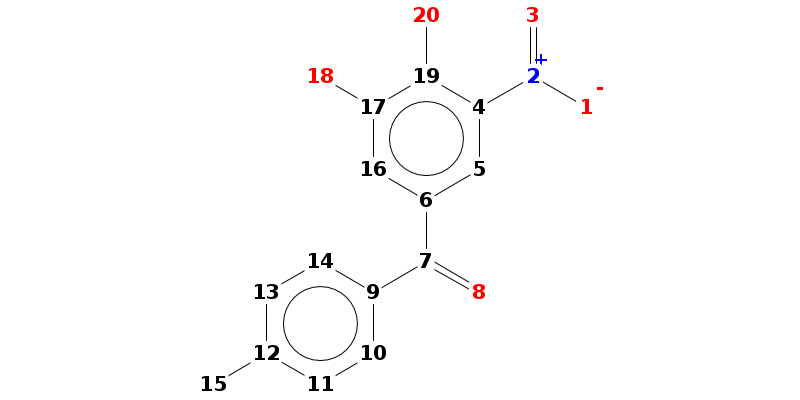

,C.10,C.11,C.12,C.13,C.14,C.15,C.16,C.17,C.19,C.4,C.5,C.6,C.7,C.9,N.2,O.1,O.18,O.20,O.3,O.8
2Cranking,5.0,4.0,6.0,4.0,5.0,1.0,3.0,9.0,7.0,10.0,2.0,13.0,12.0,11.0,8.0,None,None,None,None,None
2Cscore,97.47,96.92,1004.66,96.92,97.47,63.82,94.02,1010.6,1004.69,1010.64,91.07,1022.52,1022.52,1022.47,1004.8,997.28,1003.15,997.35,997.31,1021.37
2D6ranking,5.0,4.0,6.0,4.0,5.0,1.0,3.0,9.0,7.0,10.0,2.0,13.0,12.0,11.0,8.0,None,None,None,None,None
2D6score,99.87,98.52,1005.46,98.52,99.87,63.82,96.42,1012.2,1005.49,1012.24,93.47,1025.72,1025.72,1025.67,1005.6,997.28,1003.95,997.35,997.31,1024.57
2DSASA,25.87,29.38,5.97,29.38,25.87,64.6,22.07,4.98,5.22,4.05,18.21,3.11,3.37,4.36,2.55,43.01,43.66,41.14,42.17,31.8
Atom,C.10,C.11,C.12,C.13,C.14,C.15,C.16,C.17,C.19,C.4,C.5,C.6,C.7,C.9,N.2,O.1,O.18,O.20,O.3,O.8
Atom_id,10,11,12,13,14,15,16,17,19,4,5,6,7,9,2,1,18,20,3,8
COODist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Energy,80.8,86.3,999.0,86.3,80.8,66.4,77.2,999.0,999.0,999.0,74.1,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
Molecule,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
data = {'smiles': '[O-][N+](=O)c2cc(C(=O)c1ccc(cc1)C)cc(O)c2O', 'output_png': True}

response = requests.post('{0}/smartcyp'.format(SERVICE_BASE_URL), data=data)

response_json = response.json()
response_df = pandas.DataFrame.from_dict(response_json['result'])

img = response_json['images']['molecule_1_atomNumbers']
display(Image(base64.decodebytes(img.encode()), width=500))

response_df